# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اعمال آستانه‌گذاری قابل تطبیق</div>

## Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

The **adaptiveMethod** decides how the threshold value is calculated:

- **cv2.ADAPTIVE_THRESH_MEAN_C**: The threshold value is the mean of the neighbourhood area minus the constant C.

- **cv2.ADAPTIVE_THRESH_GAUSSIAN_C**: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

The `blockSize` determines the size of the neighbourhood area and `C` is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.


`cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)`

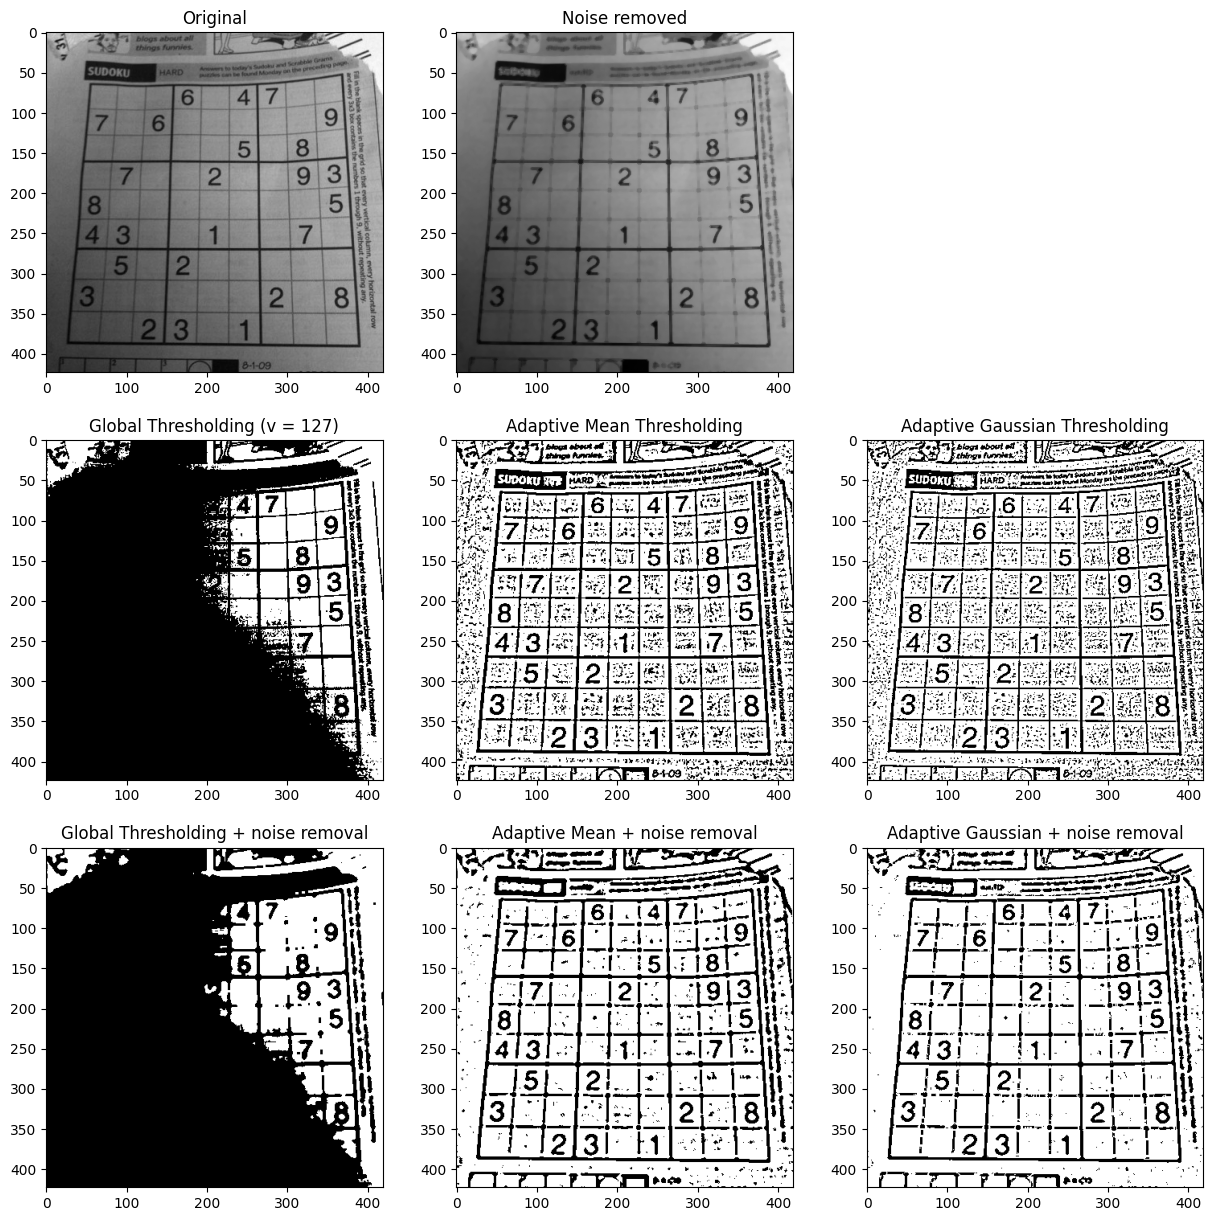

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load our new image
original_image = cv2.imread('D:/sudoku.jpg', 0)
#Noise removal
noise_removed_image = cv2.medianBlur(original_image,5)# or cv2.GaussianBlur(original_image,(5,5),0)

_,output1 = cv2.threshold(original_image,127,255,cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(original_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
output3 = cv2.adaptiveThreshold(original_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

_,output4 = cv2.threshold(noise_removed_image,127,255,cv2.THRESH_BINARY)
output5 = cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
output6 = cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)


plt.figure(figsize=[15,15])
plt.subplot(331);plt.imshow(original_image, cmap='gray');plt.title("Original");
plt.subplot(332);plt.imshow(noise_removed_image, cmap='gray');plt.title("Noise removed");

plt.subplot(334);plt.imshow(output1, cmap='gray');plt.title("Global Thresholding (v = 127)");
plt.subplot(335);plt.imshow(output2, cmap='gray');plt.title("Adaptive Mean Thresholding");
plt.subplot(336);plt.imshow(output3, cmap='gray');plt.title("Adaptive Gaussian Thresholding");

plt.subplot(337);plt.imshow(output4, cmap='gray');plt.title("Global Thresholding + noise removal");
plt.subplot(338);plt.imshow(output5, cmap='gray');plt.title("Adaptive Mean + noise removal");
plt.subplot(339);plt.imshow(output6, cmap='gray');plt.title("Adaptive Gaussian + noise removal");

https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html